# **Personal Information**

**Name:** Thomas Sijpkens

**StudentID:** 

**Email:** t.d.t.sijpkens@student.vu.nl

**Github:** https://github.com/Th0github/TSP-Instance-Hardness

**Submitted on:** N.D

In [1]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib.animation import FuncAnimation
from PIL import Image
from sklearn.cluster import KMeans


/home/ohnoyes/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# set current directory to the directory of this script
__file__ = "/home/ohnoyes/Documents/Master Project/TSP-Instance-Hardness/Replication-plots.ipynb"
os.chdir(os.path.dirname(os.path.abspath(__file__)))
print("Current directory: ", os.getcwd())

Current directory:  /home/ohnoyes/Documents/Master Project/TSP-Instance-Hardness


In [3]:
# def custom_decoder(obj):
#     if isinstance(obj, dict):
#         for key, value in obj.items():
#             if value == "Infinity":
#                 obj[key] = np.inf
#             elif isinstance(value, dict):
#                 obj[key] = custom_decoder(value)
#     elif isinstance(obj, list):
#         for i, value in enumerate(obj):
#             if value == "Infinity":
#                 obj[i] = np.inf
#             # elif isinstance(value, list):
#                 # obj[i] = np.array(value)
#             elif isinstance(value, dict):
#                 obj[i] = custom_decoder(value)
#     return obj


def load_result(file_path):
    def custom_decoder(obj):
        if isinstance(obj, dict):
            for key, value in obj.items():
                if value == "Infinity":
                    obj[key] = np.inf
                elif isinstance(value, dict):
                    obj[key] = custom_decoder(value)
        elif isinstance(obj, list):
            for i, value in enumerate(obj):
                if value == "Infinity":
                    obj[i] = np.inf
        
                elif isinstance(value, dict):
                    obj[i] = custom_decoder(value)
        return obj

    # Loading the JSON file with custom decoding
    with open(file_path, "r") as json_file:
        loaded_results = json.load(json_file, object_hook=custom_decoder)

    return loaded_results

In [4]:
def find_hardest_matrix2(loaded):
    # Find the maximum hardness value
    max_hardness = list(loaded[-1][1].values())[-1][1]
    
    # Initialize the hardest matrix
    hardest_matrix = None
    
    # Traverse through the data in reverse order
    for i in range(len(loaded) - 1, -1, -1):
        values_list = list(loaded[i][1].values())
        for j in range(len(values_list) - 1, -1, -1):
            # Check if the current hardness is equal to the maximum hardness
            if values_list[j][0] == max_hardness:
                # Assign the hardest matrix value
                hardest_matrix = values_list[j][4]
                return max_hardness, hardest_matrix
    
    return max_hardness, hardest_matrix

In [79]:
# Loads all the results from with specified configuration

# Define the parameters
cities = [10,15]
ranges = [5,10,15,20,25]
distribution = ["uniform"] #"lognormal"]
variants = ["asymmetric", "euclidean"]
mutation = ["wouter"]

filename = f"Results/"

success_loaded = 0

for dist in distribution:
    for variant in variants:
        filename += f"{dist}_{variant}/"
        for city in cities:
            filename += f"result{city}"
            for range_ in ranges:
                filename += f"_{range_}"
                for mut in mutation:
                    filename += f"_{mut}.json"
                    loaded = load_result(filename)
                    success_loaded += 1
                filename = f"Results/results{city}"
            filename = f"Results/{dist}_{variant}/"

print(f"Successfully loaded {success_loaded} files")


FileNotFoundError: [Errno 2] No such file or directory: 'Results/results10_10_wouter.json'

In [8]:
# Loading data
cities = [10,15]
ranges = [5,10,15,20,25]
lognorm_range =[0.5,2.4,3.6,5.0]
distribution = ["uniform", "lognormal"]
variants = ["asymmetric", "euclidean"]
mutation = ["wouter", "swap", "scramble"]

filename = f"Results/{distribution[1]}_{variants[1]}/result{cities[0]}_{lognorm_range[3]}_{mutation[2]}.json"
plotname = f"Results/{distribution[1]}_{variants[1]}/plot{cities[0]}_{lognorm_range[3]}_{mutation[2]}.png"
title = f"Hardness Climbed using {mutation[2]}: {distribution[1]} {variants[1]} TSP with {cities[0]} cities and {lognorm_range[3]} std"
loaded = load_result(filename)
print(f"Successfully loaded {filename} with {len(loaded)} generations")


Successfully loaded Results/lognormal_euclidean/result10_5.0_scramble.json with 3 generations


In [6]:
print("keys:", loaded.keys())
print(f"All of generations", loaded['results'].keys())
print("Getting iteration at generation 178:", loaded['results']['1']['iterations'])
print("Getting hardness at iteration 266:", loaded['results']['10']['hardest'])
print("Length of generations:", len(loaded['results']))
print(len(loaded['results'].keys()))

keys: dict_keys(['time', 'configuration', 'results'])
All of generations dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146

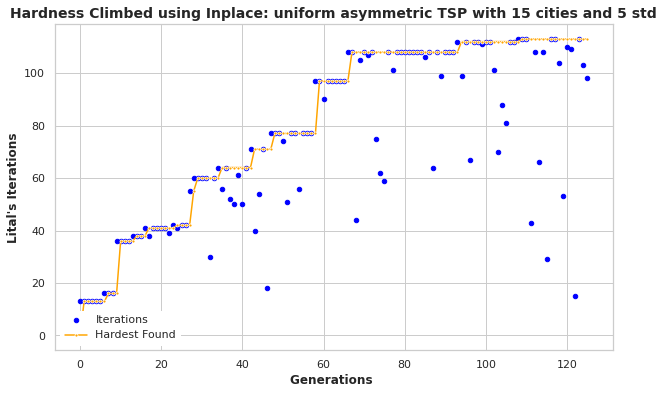

In [102]:
y_iterations = []
y_hardness = []
x_generation = range(len(loaded['results'].keys()))

for i in loaded['results'].keys():
    y_iterations.append(loaded['results'][str(i)]['iterations'])
    y_hardness.append(loaded['results'][str(i)]['hardest'])

# Create DataFrame for sns
df = pd.DataFrame({'Generation': x_generation, 'Iterations': y_iterations, 'Hardness': y_hardness})

# Plotting
plot_data = pd.DataFrame({
    'Generations': x_generation,
    'Iterations': y_iterations,
    'Hardest Found': y_hardness
})

# Plot using Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Plot iterations as scatter only (no line)
plt.scatter(plot_data['Generations'], plot_data['Iterations'], color='blue', label='Iterations', s=20)

# Plot hardest found as line plot
sns.lineplot(data=plot_data, x='Generations', y='Hardest Found', label='Hardest Found', marker='.', color='orange')

# Setting title and labels
plt.title(title, size=14, fontweight='bold')
plt.xlabel("Generations ", size=12, fontweight='bold')
plt.ylabel("Lital's Iterations", size=12, fontweight='bold')
plt.legend(loc='lower left', facecolor='white', framealpha=1)
plt.savefig(plotname, bbox_inches='tight', pad_inches=0)
plt.show()

# plt.show()

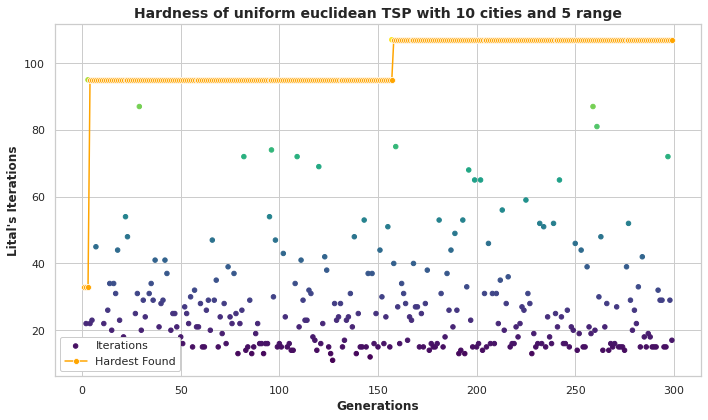

In [9]:
y_iterations = []
y_hardness = []
x_generation = range(1, len(loaded['results']))

for i in range(1, len(loaded['results'])):
    y_iterations.append(loaded['results'][str(i)]['iterations'])
    y_hardness.append(loaded['results'][str(i)]['hardest'])

# Create DataFrame for sns
df = pd.DataFrame({'Generation': x_generation, 'Iterations': y_iterations, 'Hardness': y_hardness})

# Plotting
plot_data = pd.DataFrame({
    'Generations': x_generation,
    'Iterations': y_iterations,
    'Hardest Found': y_hardness
})

# Plot using Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a colormap for the gradient
norm = plt.Normalize(min(y_iterations), max(y_iterations))
colors = cm.viridis(norm(y_iterations))  # Using 'viridis' colormap

# Plot iterations as scatter with gradient colors
plt.scatter(plot_data['Generations'], plot_data['Iterations'], color=colors, label='Iterations', s=20)

# Plot hardest found as line plot
sns.lineplot(data=plot_data, x='Generations', y='Hardest Found', label='Hardest Found', marker='o', color='orange')

# Setting title and labels
plt.title("Hardness of uniform euclidean TSP with 10 cities and 5 range", size=14, fontweight='bold')
plt.xlabel("Generations", size=12, fontweight='bold')
plt.ylabel("Lital's Iterations", size=12, fontweight='bold')
plt.legend(loc='lower left', facecolor='white', framealpha=1)

# Save plot
plt.tight_layout()
plt.savefig(plotname, bbox_inches='tight', pad_inches=0, facecolor='white')

Successfully loaded Results/uniform_asymmetric/result10_10_wouter.json with 3 generations
Successfully loaded Results/uniform_asymmetric/result10_15_wouter.json with 3 generations
Successfully loaded Results/uniform_asymmetric/result10_20_wouter.json with 3 generations
Successfully loaded Results/uniform_asymmetric/result10_25_wouter.json with 3 generations
Successfully loaded Results/uniform_asymmetric/result15_10_wouter.json with 3 generations
Successfully loaded Results/uniform_asymmetric/result15_15_wouter.json with 3 generations
Successfully loaded Results/uniform_asymmetric/result15_20_wouter.json with 3 generations
Successfully loaded Results/uniform_asymmetric/result15_25_wouter.json with 3 generations


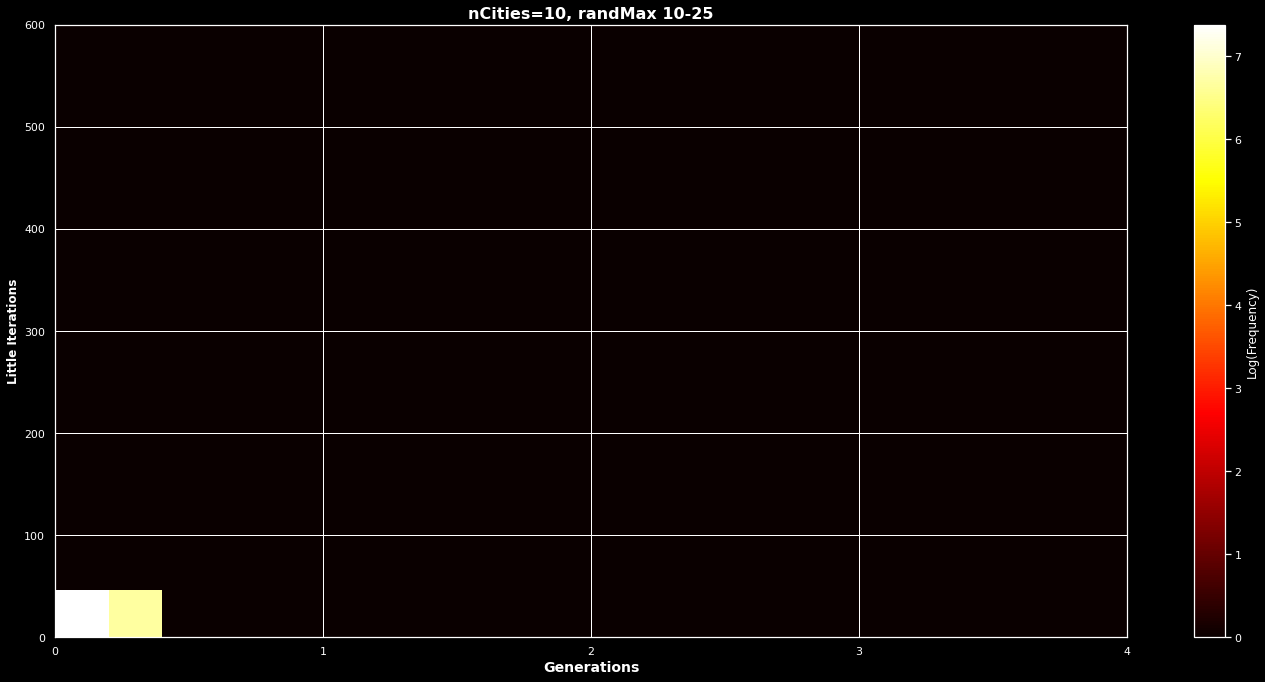

In [50]:
all_x_vals = []
all_y_vals = []
all_hardness = []




for city in cities:
    for range_val in ranges:
        for dist in distribution:
            for var in variants:
                for mut in mutation:
                    filename = f"Results/{dist}_{var}/result{city}_{range_val}_{mut}.json"
                    loaded = load_result(filename)
                    print(f"Successfully loaded {filename} with {len(loaded)} generations")
                    run_data = loaded['results']
                    for gen in run_data.keys():
                        all_x_vals.append(int(gen))
                        all_y_vals.append(run_data[gen]['iterations'] / 1000)  # Convert y values to thousands

all_x_vals = np.array(all_x_vals, dtype=float)

plt.rcParams.update({
    'font.size': 24,
    'figure.facecolor': 'black',  # Figure background color
    'axes.facecolor': 'black',  # Axes background color
    'axes.edgecolor': 'white',  # Axes edge color
    'axes.labelcolor': 'white',  # Axes labels color
    'xtick.color': 'white',  # X tick color
    'ytick.color': 'white',  # Y tick color
    'text.color': 'white',  # Text color
    'legend.facecolor': 'black',  # Legend background color
    'legend.edgecolor': 'white'  # Legend edge color
})

# Initialize the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Create a 2D histogram (heatmap)
heatmap, xedges, yedges = np.histogram2d(all_x_vals, all_y_vals, bins=[20, 13], range=[[0, 4000], [0, 600]])

# Convert the heatmap values to a logarithmic scale
heatmap_log = np.log1p(heatmap)  # Using log1p to avoid log(0) issues

# Plot the heatmap
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
im = ax.imshow(heatmap_log.T, extent=extent, origin='lower', aspect='auto', cmap='hot')

# Set labels and title
ax.set_title(f'nCities={cities[0]}, randMax {min(ranges)}-{max(ranges)}', fontweight='bold', fontsize=16)
ax.set_xlabel('Generations', fontweight='bold', fontsize=14)
ax.set_ylabel('Little Iterations', fontweight='bold', fontsize=12)
ax.set_xticks(range(0, 4001, 1000))
ax.set_xticklabels([f"{x // 1000}" for x in range(0, 4001, 1000)])
ax.set_ylim(0, 600)

# Add a colorbar with logarithmic scale
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Log(Frequency)')

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
#dict = json.loads(open("Results/hardest.json").read())
# my_super_dict = {}

# cities = [15,20]
# ranges = [0.5,2.4,10]

# for i in cities:
#     for j in ranges:
#         path = f"Results/lognorm-atsp/results{i}_{j}.json"
#         load = json.loads(open(path).read())
#         my_super_dict[f"{i}_{j}"] = load

# print(my_super_dict.keys())
# print(my_super_dict["15_0.5"].keys())
# print(my_super_dict["15_0.5"]['configurations'].keys())
# print(my_super_dict["15_0.5"]['configurations']['200'].keys())
# print(my_super_dict["15_0.5"]['configurations']['299'].keys()) # range(200,300)
# print(my_super_dict["10_30"]['configurations']['1'].keys())


dict_keys(['15_0.5', '15_2.4', '15_10', '20_0.5', '20_2.4', '20_10'])
dict_keys(['time', 'configurations'])
dict_keys(['200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'])
dict_keys(['iterations', 'hardest', 'optimal_tour', 'optimal_cost', 'matrix'])
dict_keys(['iterations', 'hardest', 'optimal_tour', 'optimal_cost', 'matrix'])


# Plotting Uniform ATSP for cities = [10,15,20] and randmax = [20,30]

In [ ]:
print(len(my_super_dict[10]['configurations']))


y_iterations = []
y_hardness = []
x = range(1, len(super_dict[10]['configurations'])-4) # -5 to remove the configurations in the beginning
for i in range(len(super_dict[10]['configurations'])-5):
    y_iterations.append(super_dict[10]['configurations'][str(i)]['iterations'])
    y_hardness.append(super_dict[10]['configurations'][str(i)]['hardest'])

plt.plot(x, y_iterations, label="iterations")
plt.plot(x, y_hardness, label="Hardness Found")
set_title = "City = 10, rand_max = 20, mutation_type = inplace"
plt.title(set_title)
plt.xlabel("Mutations")
plt.ylabel("Lital's Iterations")

# Uniform ATSP for Cities of size [10, 15, 20] and randmax = [20,30]

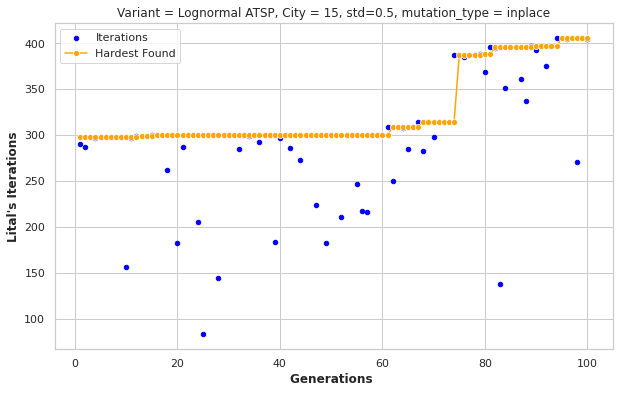

In [28]:
y_iterations = []
y_hardness = []
x = range(1, 101) # -5 to remove the configurations in the beginning
for i in range(200,300):
    y_iterations.append(my_super_dict["15_0.5"]['configurations'][str(i)]['iterations'])
    y_hardness.append(my_super_dict["15_0.5"]['configurations'][str(i)]['hardest'])

# Create DataFrame for sns
plot_data = pd.DataFrame({
    'Mutations': x,
    'Iterations': y_iterations,
    'Hardest Found': y_hardness
})

# Plot using Seaborn
# sns.set(style="whitegrid")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))


# Plot iterations as scatter only (no line)
plt.scatter(plot_data['Mutations'], plot_data['Iterations'], color='blue', label='Iterations', s=20)

# Plot hardest found as line plot
sns.lineplot(data=plot_data, x='Mutations', y='Hardest Found', label='Hardest Found', marker='o', color='orange')

# Setting title and labels
plt.title("Variant = Lognormal ATSP, City = 15, std=0.5, mutation_type = inplace")
plt.xlabel("Generations ", size=12, fontweight='bold')
plt.ylabel("Lital's Iterations", size=12, fontweight='bold')
plt.legend()
os.makedirs("Results/lognorm-atsp/plots", exist_ok=True)
plt.savefig("Results/lognorm-atsp/plots/15_0.5.png")
plt.show()

extracting data from 15_0.5
extracting data from 15_2.4
extracting data from 15_10
extracting data from 20_0.5
extracting data from 20_2.4
extracting data from 20_10


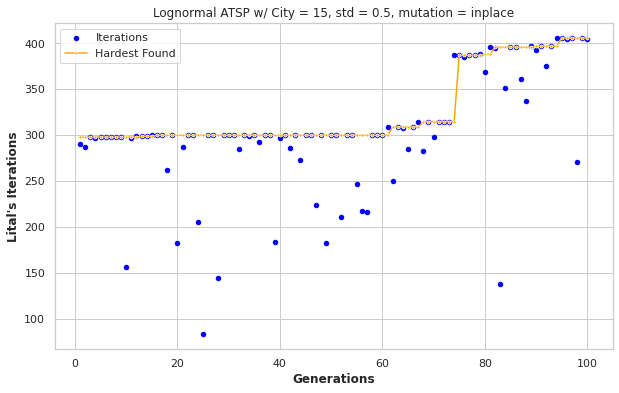

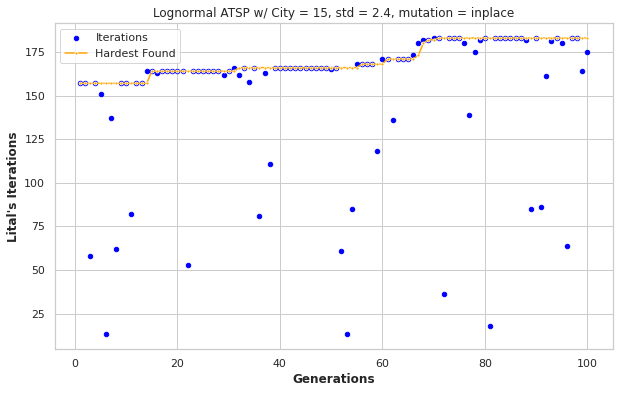

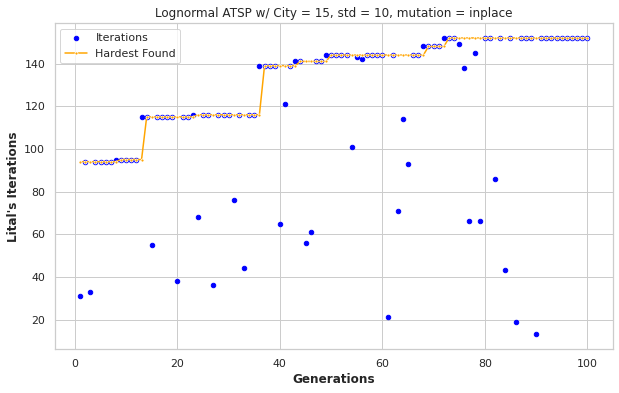

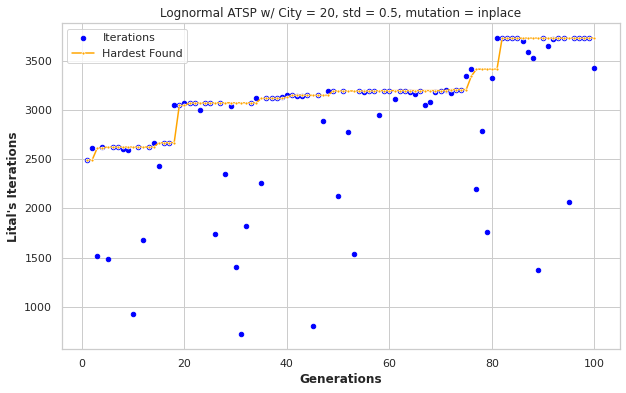

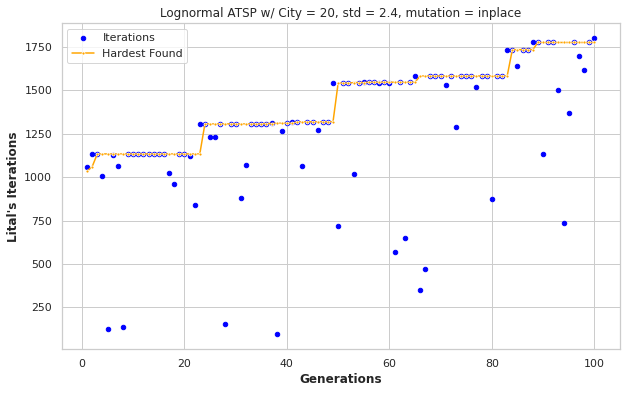

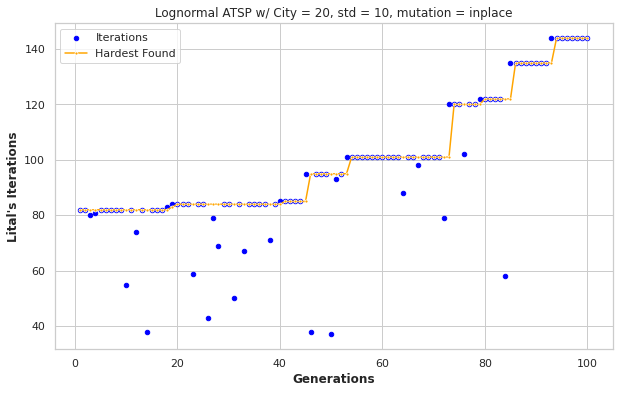

In [31]:
cities = [15,20]
ranges = [0.5,2.4,10]

# Loop through multiple pairs
for city in cities:
    for rand_max in ranges:
        key = f"{city}_{rand_max}"
        if key in my_super_dict:
            # Extract data
            print("extracting data from", key)
            y_iterations = []
            y_hardness = []
            x = range(1, 101)  # Adjust range
            for i in range(200, 300):
                y_iterations.append(my_super_dict[key]['configurations'][str(i)]['iterations'])
                y_hardness.append(my_super_dict[key]['configurations'][str(i)]['hardest'])

            # Create DataFrame for sns
            plot_data = pd.DataFrame({
                'Mutations': x,
                'Iterations': y_iterations,
                'Hardest Found': y_hardness
            })

            # Plot using Seaborn
            sns.set_theme(style="whitegrid")
            plt.figure(figsize=(10, 6))

            # Plot iterations as scatter only (no line)
            plt.scatter(plot_data['Mutations'], plot_data['Iterations'], color='blue', label='Iterations', s=20)

            # Plot hardest found as line plot
            sns.lineplot(data=plot_data, x='Mutations', y='Hardest Found', label='Hardest Found', marker='.', color='orange')

            # Setting title and labels
            plt.title(f"Lognormal ATSP w/ City = {city}, std = {rand_max}, mutation = inplace")
            plt.xlabel("Generations", fontweight='bold')
            plt.ylabel("Lital's Iterations", size=12, fontweight='bold')
            plt.legend()

            # Create directory if it doesn't exist
            os.makedirs('Results/lognorm-atsp/plots', exist_ok=True)
            plt.savefig(f'Results/plots/lognorm_atsp_{key}_inplace.png')
            #plt.show()

In [ ]:
cities = [10,15,20]
ranges = [20, 30]

results_path_uniform_tsp = 'Results/uniform_tsp/'
# Load each result file
for i in cities:
    for j in ranges:
        path = f"{results_path_uniform_tsp}results{i}_{j}.json"
        loaded = load_result(path)
        current_dict = loaded

    y_iterations = []
    y_hardness = []
    x = range(1, len(current_dict[10]['configurations'])-4) # -5 to remove the configurations in the beginning
    for i in range(len(current_dict[10]['configurations'])-5):
        y_iterations.append(current_dict[10]['configurations'][str(i)]['iterations'])
        y_hardness.append(current_dict[10]['configurations'][str(i)]['hardest'])

    plt.plot(x, y_iterations, label="iterations")
    plt.plot(x, y_hardness, label="Hardness Found")
    set_title = "City = 10, rand_max = 20, mutation_type = inplace"
    plt.title(set_title)
    plt.xlabel("Mutations")
    plt.ylabel("Lital's Iterations" , size=12)
    plt.savefig(f"Results/uniform_tsp/Plots/{i}_{j}.png")

In [90]:
with open('results5_20.json', 'r') as file:
    data = json.load(file)

# Access entries with "iterations" and "hardest"
for key, value in enumerate(data):
    if isinstance(value, dict):
        iterations = value.get('iterations')
        hardest = value.get('hardest')
        print(f"Entry {index}: iterations = {iterations}, hardest = {hardest}")

dumbass


In [67]:
super_dict_data = super_dict[10]
print(f"Data for city {city} from super_dict:", super_dict_data)

print(f"Shape of the data: {len(super_dict_data)}")

# Extract 
#iterations = [data[0] for data in super_dict_data[0][1].values()]
print(f"Lital's iteration values: {iterations}")

#hardest = [data[1] for data in super_dict_data[0][2].values()]
#print(f"Lital's hardness values: {hardest}")

#hardness = [data[1] for data in super_dict_data[10]]
print(f"Hardness values: {hardest}")


KeyError: 10

In [31]:
# Example: Accessing data from super_dict and hardest_dict
print("Hello World")
# Accessing data for a specific city from super_dict
city = 25
super_dict_data = super_dict[city]
print(f"Data for city {city} from super_dict:", super_dict_data)

# Accessing the hardest matrix and its hardness value from hardest_dict
hardest_data = hardest_dict[city]
hardness_value, hardest_matrix = hardest_data
print(f"Hardness value for city {city} from hardest_dict:", hardness_value)
print(f"Hardest matrix for city {city} from hardest_dict:", hardest_matrix)

print("keys:",super_dict.keys())

print("values:",super_dict[10].values())

for city_idx, (city_range, city_results) in enumerate(uberdict.items()):
    for result_idx, (result_range, data) in enumerate(city_results.items()):
        print(f"City {city_idx}, result {result_idx}, data: {data}")
        print(f"City {city_idx}, result {result_idx}, data: {data['data']}")
        print(f"City {city_idx}, result {result_idx}, data: {data['hardness']}")



Data for city 25 from super_dict: [[586.4420998096466, {'0': [1516, 0, [[6, 9], [13, 5], [12, 13], [18, 3], [20, 12], [15, 20], [1, 21], [2, 10], [21, 17], [9, 22], [4, 1], [17, 15], [23, 14], [5, 0], [19, 11], [24, 6], [11, 7], [8, 24], [0, 23], [7, 2], [14, 19], [22, 18], [10, 16], [3, 4], [16, 8]], 35.0360818857589, [[inf, 15.887138308564188, 6.299593598928961, 3.850343869421453, 14.050914709857166, 5.827319655312458, 17.67744697449236, 8.55713230603914, 18.517278242198554, 7.887539907418359, 19.385852865876473, 12.933077934283563, 13.993602247426093, 11.140899597276118, 4.032585864652882, 19.198266848566654, 15.77210062771889, 18.364586667075276, 14.98447097124094, 10.568871932370758, 9.066990430866237, 13.451158580130935, 10.63371878121953, 0.2916253850994366, 2.0882217043467444], [6.902135616966514, inf, 7.820019701418128, 16.89526077937095, 12.921353574406012, 17.247449177924686, 3.094769031807767, 17.082982593250577, 16.240383522752573, 17.978522968914163, 13.181299475941586, 1

In [39]:
cities = [10, 15, 20, 25, 30]
ranges = [20]

results_path = 'Results/'
runs = [name for name in os.listdir(results_path) if os.path.isdir(os.path.join(results_path, name))]

data_to_save = {}

for city in cities:
    data_to_save[city] = {}
    for range_val in ranges:
        max_x_values = []
        run_data = []
        conv_list = []
        k = 0

        for run in runs:
            if k > lowest:
                break
            base_path = f"Results/{run}/results{city}_{range_val}"
            if not os.path.exists(base_path + '.json'):
                continue
            k += 1
            file_paths = [base_path + '.json']
            # Automatically add files that are extensions of the main file
            part_num = 0
            while os.path.exists(base_path + f'_{part_num}.json'):
                file_paths.append(base_path + f'_{part_num}.json')
                part_num += 1

            combined_x_values = []
            combined_y_values = []

            for path in file_paths:
                try:
                    loaded = load_result(path)
                except:
                    continue

                for hundred_gens in loaded:
                    current_x_values = list(hundred_gens[1].keys())
                    current_y_values_1 = [values[1] for values in hundred_gens[1].values()]

                    combined_x_values.extend(current_x_values)
                    combined_y_values.extend(current_y_values_1)

            if len(combined_x_values) > len(max_x_values):
                max_x_values = combined_x_values
            run_data.append((combined_x_values, combined_y_values))
            if combined_y_values:
                conv_list.append(len(combined_y_values))

        data_to_save[city][range_val] = {
            "run_data": run_data,
            "conv_list": conv_list,
            "max_x_values": max_x_values
        }

with open('superraam.json', 'w') as f:
    json.dump(data_to_save, f)

In [ ]:
# Plot lognormal distribution
def lognormal(x, mu, sigma):
    return 1/(x * sigma * np.sqrt(2 * np.pi)) * np.exp(- (np.log(x) - mu)**2 / (2 * sigma**2))

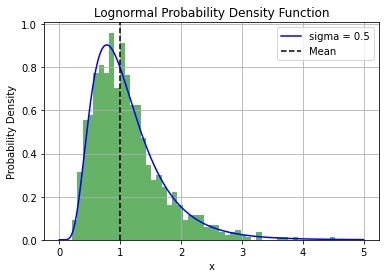

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters for the lognormal distribution
mean = 0
sigma = 0.5

# Generate x values
x = np.linspace(0, 5, 1000)
x_hist = np.random.lognormal(mean, sigma, 1000)


# Calculate the lognormal PDF
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mean))
#cdf = lognorm.cdf(x, s=sigma, scale=np.exp(mean))

# Plot the lognormal distribution
plt.plot(x, pdf, label='sigma = 0.5', color='blue')
plt.hist(x_hist, bins=50, density=True, alpha=0.6, color='green')
#plt.plot(x, cdf, label='Lognormal CDF', color='red')
plt.axvline(np.exp(mean), color='black', linestyle='--', label='Mean')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Lognormal Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'lognormal' is not defined

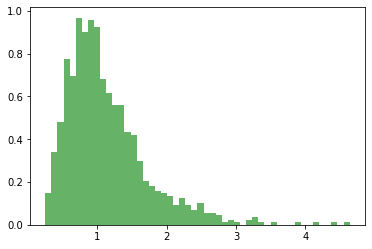

In [121]:

plt.hist(x, bins=50, density=True, alpha=0.6, color='g')
plt.plot
plt.show()

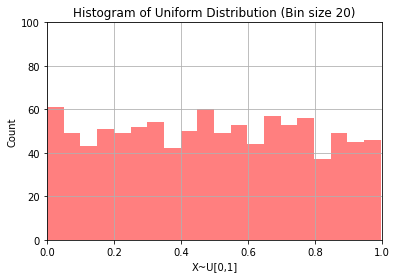

In [120]:
data = np.random.uniform(0,1,1000) # You are generating 1000 points between 0 and 1.
count, bins, ignored = plt.hist(data, 20, facecolor='red', alpha=0.5) # 20 bins

plt.xlabel('X~U[0,1]')
plt.ylabel('Count')
plt.title("Histogram of Uniform Distribution (Bin size 20)")
plt.axis([0, 1, 0, 100]) # x_start, x_end, y_start, y_end
plt.grid(True)

plt.show(block = False)